In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
from pylab import *
import csv
import cartopy.crs as ccrs
from scipy.ndimage import gaussian_filter

In [47]:
#Combi = pd.read_csv('Gaussian_Filtered_HF.txt', sep=' ')#, low_memory=False)
Combi = pd.read_csv('Combined_HF_new_new.txt', sep=' ')#, low_memory=False)
#Combi = pd.read_csv('Gaussian_Filtered_HF_Gondwana.txt', sep=' ')#, low_memory=False)
#Combi = pd.read_csv('Gondwana_HF.txt', sep=' ')#, low_memory=False)
#Combi[['HP_combined', 'Con_combined']] = Combi[['HP_combined', 'Con_combined']].astype(float)
print(len(Combi))
Combi.tail(20)

59184


,Lon,Lat,HF
59164,-58.760833,-53.189667,49.0
59165,-58.643333,-53.191500,41.0
59166,164.498861,-77.089333,80.0
59167,-64.066667,-66.033333,80.0
59168,-19.733300,-59.233300,64.0
59169,-13.483300,-59.800000,30.0
59170,-3.666700,-60.583300,49.0
59171,-7.466700,-64.966700,41.0
59172,-21.583300,-70.650000,60.0
59173,-26.050000,-69.983300,84.0


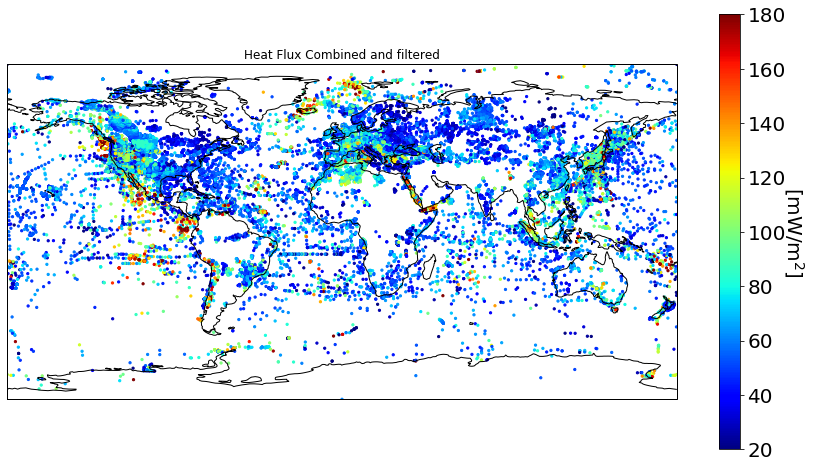

In [48]:
Lon_c = Combi.Lon
Lat_c = Combi.Lat
HF_c = Combi.HF

fig1 = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon_c,Lat_c,c=HF_c,cmap='jet', marker='o', s=5, vmin=20, vmax=180)
cb1 = plt.colorbar()
cb1.set_label('[mW/m$^2$]', labelpad=20, fontsize=20, rotation=270) 
plt.title('Heat Flux Combined and filtered')
cb1.ax.tick_params(labelsize=20)
#plt.savefig('HeatFlux_Combined_GF_Gondwana.jpg')
plt.show()

In [49]:
binsX=721 #1441 #721 #361
binsY=391 #781 #391 #181
Combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59184 entries, 0 to 59183
Data columns (total 3 columns):
Lon    59181 non-null float64
Lat    59182 non-null float64
HF     59184 non-null float64
dtypes: float64(3)
memory usage: 1.4 MB


In [50]:
Combi = Combi.dropna(subset=(['Lon','Lat']))
Lon_c = Combi.Lon
Lat_c = Combi.Lat
HF_c = Combi.HF
Combi.tail()

,Lon,Lat,HF
59179,-36.9500,-64.0667,175.0
59180,-38.4500,-63.1000,105.0
59181,-41.1667,-55.6500,81.0
59182,180.0000,90.0000,1.0
59183,-180.0000,90.0000,1.0


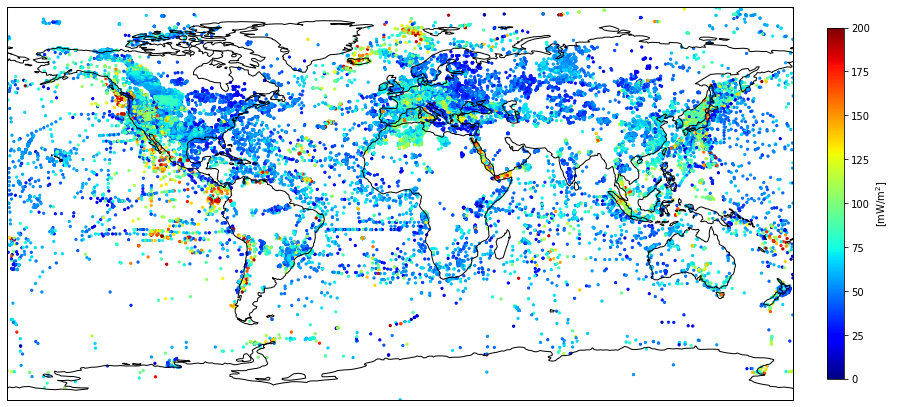

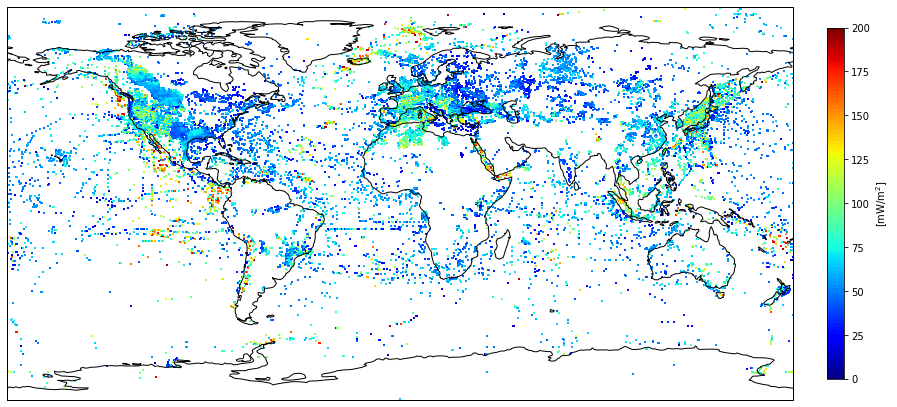

In [51]:
fig2 = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(Lon_c,Lat_c,c=HF_c,cmap='jet',marker='o',s=5, vmin=0, vmax=200)
cb = plt.colorbar(fraction=0.021, pad=0.04)
cb.set_label('[mW/m$^2$]')  
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()
    
H, xedges, yedges, binnumber = stats.binned_statistic_2d(Lon_c, Lat_c, values = HF_c,  
                statistic =np.nanmean, bins = [binsX, binsY])
XX, YY = np.meshgrid(xedges, yedges)

fig3 = plt.figure(figsize = (15,8))
ax1=plt.subplot(111)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
cmap= cm.get_cmap('jet', 100)
plot1 = ax1.pcolormesh(XX,YY,H.T,cmap=cmap, vmin=0, vmax=200)
cbar = plt.colorbar(plot1,ax=ax1,pad=.04,fraction=0.021)
cbar.set_label('[mW/m$^2$]') 
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

In [52]:
lowerx = resize(xedges,len(xedges)-1)
xmid = lowerx + 0.5*diff(xedges)

lowery = resize(yedges,len(yedges)-1)
ymid = lowery + 0.5*diff(yedges)

YYn, XXn = np.meshgrid(ymid, xmid)
#YYn = np.around(YYn*4)/4
#XXn = np.around(XXn*4)/4
YYn = np.around(YYn*2)/2
XXn = np.around(XXn*2)/2
#YYn = np.around(YYn)
#XXn = np.around(XXn)

print(XXn)
print(' ')
print(YYn)
M=np.vstack((XXn.ravel(),YYn.ravel())).T
np.savetxt('Geo_Coordinates_05.txt', M, fmt='%.3f')

[[-180.  -180.  -180.  ... -180.  -180.  -180. ]
 [-179.5 -179.5 -179.5 ... -179.5 -179.5 -179.5]
 [-179.  -179.  -179.  ... -179.  -179.  -179. ]
 ...
 [ 179.   179.   179.  ...  179.   179.   179. ]
 [ 179.5  179.5  179.5 ...  179.5  179.5  179.5]
 [ 180.   180.   180.  ...  180.   180.   180. ]]
 
[[-90.  -89.5 -89.  ...  89.   89.5  90. ]
 [-90.  -89.5 -89.  ...  89.   89.5  90. ]
 [-90.  -89.5 -89.  ...  89.   89.5  90. ]
 ...
 [-90.  -89.5 -89.  ...  89.   89.5  90. ]
 [-90.  -89.5 -89.  ...  89.   89.5  90. ]
 [-90.  -89.5 -89.  ...  89.   89.5  90. ]]


In [53]:
Data = np.loadtxt('Geo_Coordinates_05.txt')
print(len(Data))

281911


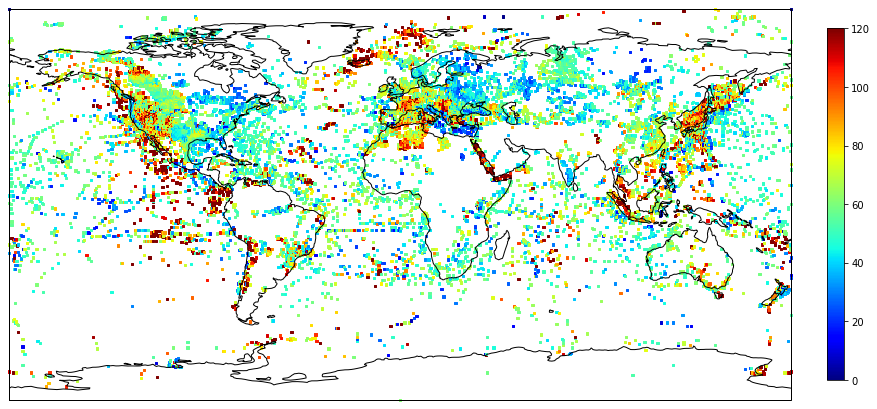

In [54]:
positions_new = np.vstack(([XXn.ravel(), YYn.ravel(), H.ravel()])).T

f = open("Binned_Data_HF_05.csv", "w")
writer = csv.DictWriter(
    f, fieldnames=["Lon", "Lat", "Heatflow"])
writer.writeheader()
writer = csv.writer(f)
writer.writerows(positions_new)
f.close()

np.savetxt('Binned_Data_HF_05.txt', positions_new, fmt='%.3f')

x=positions_new[:,0]
y=positions_new[:,1]
z=positions_new[:,2]

fig5 = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(x,y,c=z,cmap='jet',marker='s',s=5, vmin=0, vmax=120)
cb = plt.colorbar(fraction=0.021, pad=0.04)
plt.xlim([-181,181])
plt.ylim([-91,91])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

# Binning Gondwana

In [ ]:
Gondwana = pd.read_csv('Gondwana_HF.csv')

binsX=1441 
binsY=781 

In [105]:
Data = np.loadtxt('Binned_Data_GF_Gondwana_HF_05.txt')
print(len(Data))
Lon = []
Lat = []
HF = []
for i in range(len(Data)):
    if not np.isnan(Data[i,2]):
        Lon.append(Data[i,0])
        Lat.append(Data[i,1])
        HF.append(Data[i,2])
M=np.vstack((Lon,Lat,HF)).T
np.savetxt('Binned_Data_GF_Gondwana_HF_05_noNaN.txt', M, fmt='%.3f')
print(len(Lon))
    

281911
1104


In [ ]:
x = Gondwana.longitude
y = Gondwana.latitude
z  = Gondwana.HF

fig2 = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(x,y,c=z,cmap='jet',marker='o',s=5, vmin=0, vmax=200)
cb = plt.colorbar(fraction=0.021, pad=0.04)
cb.set_label('[mW/m$^2$]')  
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()
    
H, xedges, yedges, binnumber = stats.binned_statistic_2d(x, y, values = z,  
                statistic =np.nanmean, bins = [binsX, binsY])
XX, YY = np.meshgrid(xedges, yedges)

fig3 = plt.figure(figsize = (15,8))
ax1=plt.subplot(111)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
cmap= cm.get_cmap('jet', 100)
plot1 = ax1.pcolormesh(XX,YY,H.T,cmap=cmap, vmin=0, vmax=200)
cbar = plt.colorbar(plot1,ax=ax1,pad=.04,fraction=0.021)
cbar.set_label('[mW/m$^2$]') 
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

In [ ]:
lowerx = resize(xedges,len(xedges)-1)
xmid = lowerx + 0.5*diff(xedges)

lowery = resize(yedges,len(yedges)-1)
ymid = lowery + 0.5*diff(yedges)

YYn, XXn = np.meshgrid(ymid, xmid)
YYn = np.around(YYn*2)/2
XXn = np.around(XXn*2)/2

print(XXn)
print(' ')
print(YYn)

1125421
1334


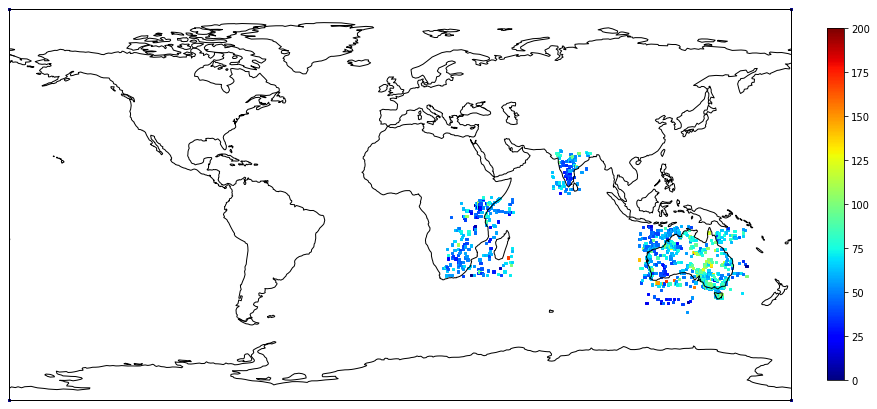

In [15]:
positions_new = np.vstack(([XXn.ravel(), YYn.ravel(), H.ravel()])).T
print(len(positions_new))

Lon=[]
Lat=[]
HF=[]
for i in range(len(positions_new)):
    if np.isnan(positions_new[i,2])==False:
        Lon.append(positions_new[i,0])
        Lat.append(positions_new[i,1])
        HF.append(positions_new[i,2])
print(len(HF))

x=positions_new[:,0]
y=positions_new[:,1]
z=positions_new[:,2]

fig5 = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(x,y,c=z,cmap='jet',marker='s',s=5, vmin=0, vmax=200)
cb = plt.colorbar(fraction=0.021, pad=0.04)
plt.xlim([-181,181])
plt.ylim([-91,91])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

In [16]:
p = np.vstack((Lon,Lat,HF)).T
np.savetxt('Binned_Gondwana_HF_05.txt', p, fmt='%.3f')